# Đề kiểm tra lập trình nhập môn phân tích dữ liệu và học sâu

### Sinh viên không được phép sử dụng internet
### Sinh viên sau khi làm bài xong xuất ra file PDF đồng thời nộp lên Fit-lab và push lên git-hub
### Sinh viên làm bắt đầu làm bài từ 15h40 - 18h00

In [ ]:
# Họ và Tên: Quang Mỹ Tâm
# MSSV: 2274802010784

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
#Bước 1: Load data
from sklearn.datasets import load_iris
def load_dataset():
    X, y = load_iris(return_X_y=True)
    X = X[y!=2]
    y = y[y!=2]
    return X,y

X,y=load_dataset()
print(load_dataset())
print(X.shape,y.shape)
#Điền ở đây
#X,y=load_dataset()
#print(X.shape,y.shape)

(array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 

Kết quả: (100, 4) (100,)

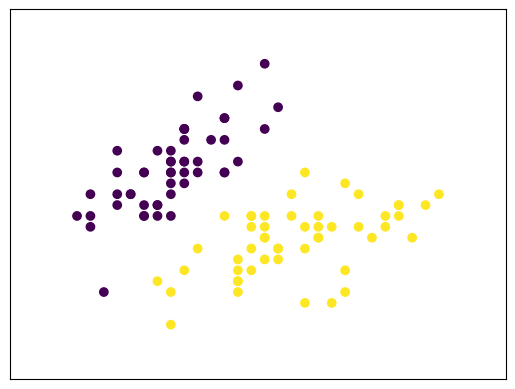

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import datasets
import numpy as np
#Trực quan hóa dữ liệu data
#Điền code ở đây
X_min, X_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
#SCATTERPLOT
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(X_min, X_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Kết quả

In [4]:
import torch.nn as nn
# Bước 2: Định nghĩa mô hình hồi quy logistic bằng PyTorch
class LogisticRegressTorch(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegressTorch, self).__init__()
        #Điền ở đây theo comment                # tạo một lớp tuyến tính (nn.Linear) với n_features đầu vào và 1 đầu ra
        self.linear = nn.Linear(n_features, 1)
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"
# Bước 3: Định nghĩa lớp dữ liệu
class IrisTorch(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.X)  #Điền ở đây theo comment            #trả về số lượng mẫu trong tập dữ liệu (số lượng hàng trong self.X)

    def __getitem__(self, idx):
        X, y = self.X[idx], self.y[idx]
        return  X.to(device), y.to(device)#Điền ở đây theo comment            #trả về một cặp đặc trưng và nhãn tương ứng với chỉ số idx

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
# Tạo dữ liệu
dataset =IrisTorch(X, y)

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
# Bước 4: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra bằng cách chia ngẫu nhiên 70,30.
train_size =int(0.7 * len(dataset))                                   #70%
test_size =int(0.3* len(dataset))                                      #30%
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [8]:
# Tạo DataLoader
batch_size = 64
train_loader =DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader =DataLoader(train_dataset, batch_size=batch_size, shuffle=False)


In [9]:
# Bước 5: Định nghĩa criterion và optimizer
n_features = X.shape[1]
model =LogisticRegressTorch(n_features)
criterion =nn.BCELoss()
optimizer =optim.SGD(model.parameters(), lr=0.01)

Epoch 1/200, Train Loss: 1.1797, Test Loss: 1.0066, Test Accuracy: 0.5000
Epoch 2/200, Train Loss: 0.9988, Test Loss: 0.8722, Test Accuracy: 0.5000
Epoch 3/200, Train Loss: 0.8676, Test Loss: 0.7941, Test Accuracy: 0.5000
Epoch 4/200, Train Loss: 0.7914, Test Loss: 0.7484, Test Accuracy: 0.4857
Epoch 5/200, Train Loss: 0.7477, Test Loss: 0.7295, Test Accuracy: 0.4571
Epoch 6/200, Train Loss: 0.7286, Test Loss: 0.7111, Test Accuracy: 0.4286
Epoch 7/200, Train Loss: 0.7105, Test Loss: 0.6983, Test Accuracy: 0.5143
Epoch 8/200, Train Loss: 0.6984, Test Loss: 0.6909, Test Accuracy: 0.5571
Epoch 9/200, Train Loss: 0.6905, Test Loss: 0.6798, Test Accuracy: 0.5857
Epoch 10/200, Train Loss: 0.6798, Test Loss: 0.6724, Test Accuracy: 0.6857
Epoch 11/200, Train Loss: 0.6731, Test Loss: 0.6703, Test Accuracy: 0.6429
Epoch 12/200, Train Loss: 0.6694, Test Loss: 0.6533, Test Accuracy: 0.7571
Epoch 13/200, Train Loss: 0.6527, Test Loss: 0.6414, Test Accuracy: 0.6000
Epoch 14/200, Train Loss: 0.6411, 

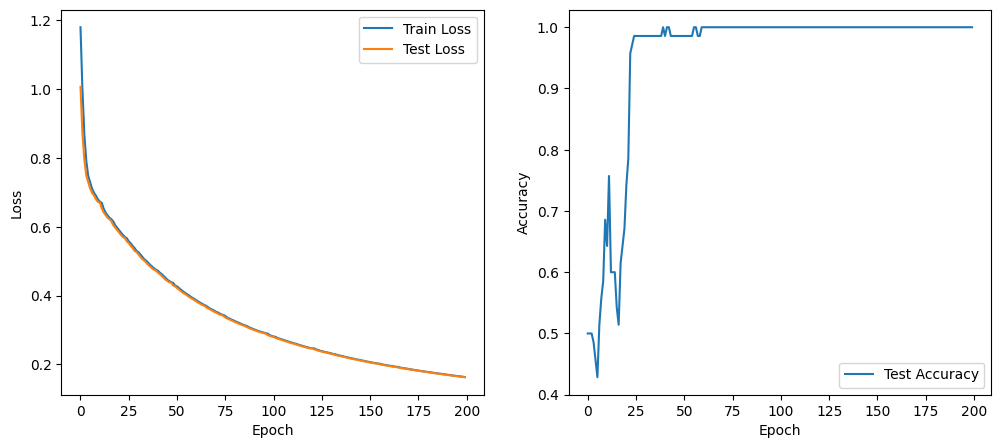

In [10]:
# Huấn luyện mô hình
n_epochs = 200
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Đánh giá trên tập kiểm tra
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)

            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    accuracy = correct / total
    test_accuracies.append(accuracy)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')  # Use train_losses instead of train_loss
plt.plot(test_losses, label='Test Loss')   # Use test_losses instead of test_loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

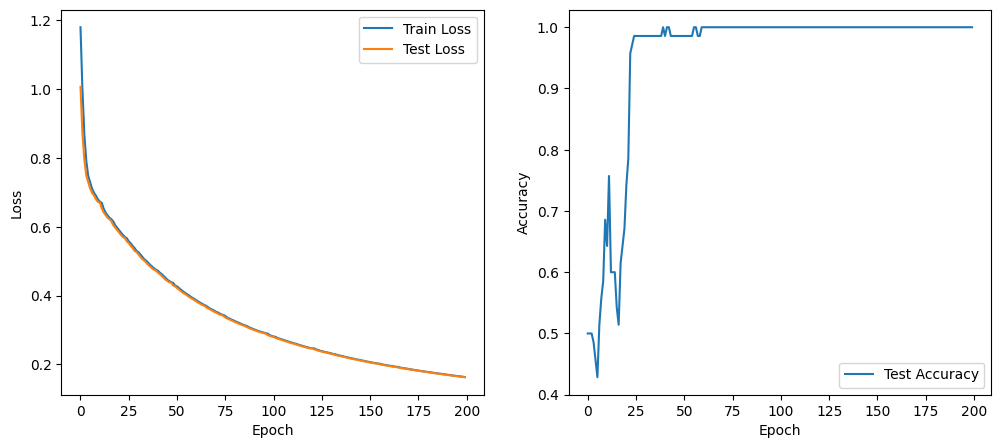

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')  # Use train_losses instead of train_loss
plt.plot(test_losses, label='Test Loss')   # Use test_losses instead of test_loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Kết quả: